<a href="https://colab.research.google.com/github/I-jidd/Data-Analysis/blob/main/Fashion_Mnist_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [6]:
#load fashion mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("train images shape: ", train_images.shape)
print("test images shape: ", test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train images shape:  (60000, 28, 28)
test images shape:  (10000, 28, 28)


In [7]:
import numpy as np

unique_labels = np.unique(train_labels)

print("Unique classes (labels):", unique_labels)

Unique classes (labels): [0 1 2 3 4 5 6 7 8 9]


In [8]:
#define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# print the corresponding class names for the unique labels
for label in unique_labels:
  print(f"Class {label}: {class_names[label]}")

Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


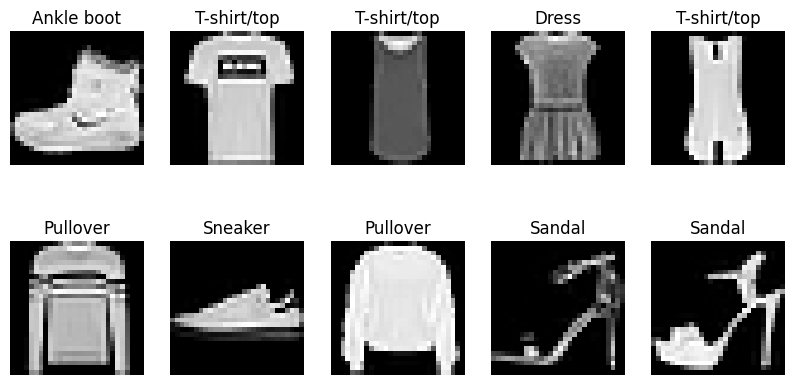

In [20]:
plt.figure(figsize=(10, 5))

for i in range(len(unique_labels)):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_images[i], cmap= 'gray')
  plt.title(class_names[train_labels[i]])
  plt.axis('off')
plt.show()

In [21]:
#normalize the images
train_images = train_images/255.0
test_images = test_images/255.0

In [22]:
print(train_images)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


add a channel on this since CNN expects input with channels

In [23]:
#add a channel dimension for grayscale images
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("training data shape: ", train_images.shape)
print("test data shape: ", test_images.shape)

training data shape:  (60000, 28, 28, 1)
test data shape:  (10000, 28, 28, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [28]:
#build the cnn model
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),# add dropout to reduce overfitting
    Dense(10, activation='softmax') #output layer for 10 classes
    ]
)

In [30]:
#compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7007 - loss: 0.8295 - val_accuracy: 0.8543 - val_loss: 0.3959
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.8523 - loss: 0.4141 - val_accuracy: 0.8773 - val_loss: 0.3319
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.8715 - loss: 0.3550 - val_accuracy: 0.8922 - val_loss: 0.2985
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.8855 - loss: 0.3153 - val_accuracy: 0.8927 - val_loss: 0.2827
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.8981 - loss: 0.2784 - val_accuracy: 0.8998 - val_loss: 0.2675
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9016 - loss: 0.2631 - val_accuracy: 0.8956 - val_loss: 0.2742
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9071 - loss: 0.2492 - val_accuracy: 0.9093 - val_loss: 0.2468
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9134 -

In [32]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9088 - loss: 0.2629
Test Accuracy: 90.75%


In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


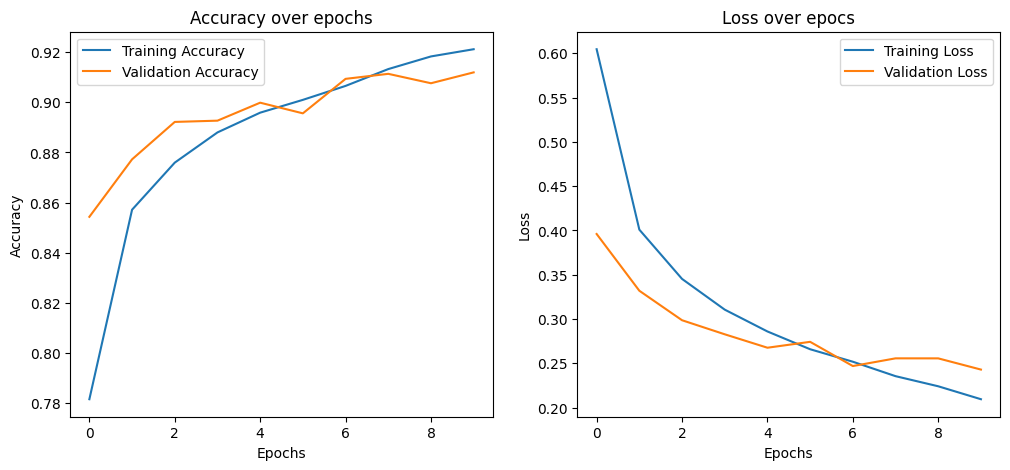

In [34]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'],label ='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epocs')
plt.legend()

plt.show()